# Probabilidad y Estadística (C)

**2019 - 2doC**

---

> # Trabajo en laboratorio 2do encuentro:
> # *Estadística descriptiva y Procesos de Poisson.*

![tp2/1.png](./img/tp2/1.png)

In [302]:
generador <- function(){
  acum <- 0
  n <- 0
  while(acum < 1){
    n <- n+1
    acum <- acum + runif(1, 0,1)
  }
  return(n)
}


In [303]:
suma <- 0
for(i in 1:300000){
    suma <- suma + generador()
}
esperanza <- suma/300000
esperanza

[1] 2,719283

![tp2/2.png](./img/tp2/2.png)

![tp2/2a.png](./img/tp2/2a.png)

In [304]:
data <- read.delim("./data/tp2/dietas.txt")
head(data)

dietaa,dietab,dietac
105,83,72
86,80,72
109,69,69
87,77,95
90,76,70
104,78,68


![tp2/2b.png](./img/tp2/2b.png)

[1] 99

[1] 98,68

[1] 98,525

[1] 98,53333

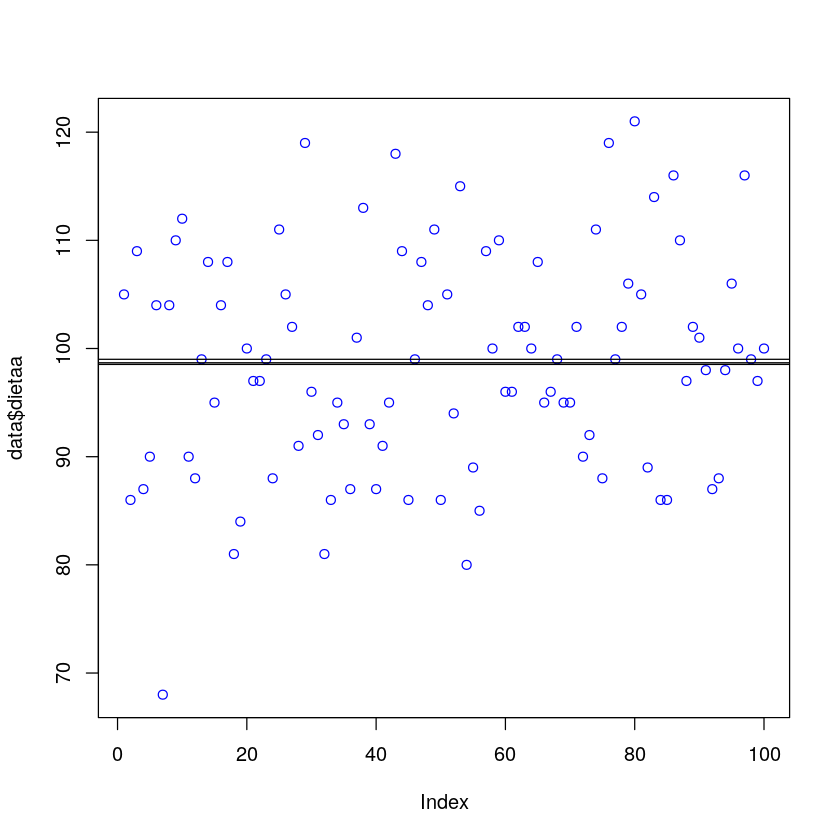

In [305]:
# Dieta A
median(data$dietaa)
mean(data$dietaa)
mean(data$dietaa, trim=0.1)
mean(data$dietaa, trim=0.2)
# Plot
plot(data$dietaa, col="blue")
abline(h=median(data$dietaa))
abline(h=mean(data$dietaa))
abline(h=mean(data$dietaa, trim=0.1))
abline(h=mean(data$dietaa, trim=0.2))

[1] 94,5

[1] 94,46

[1] 94,5

[1] 94,4

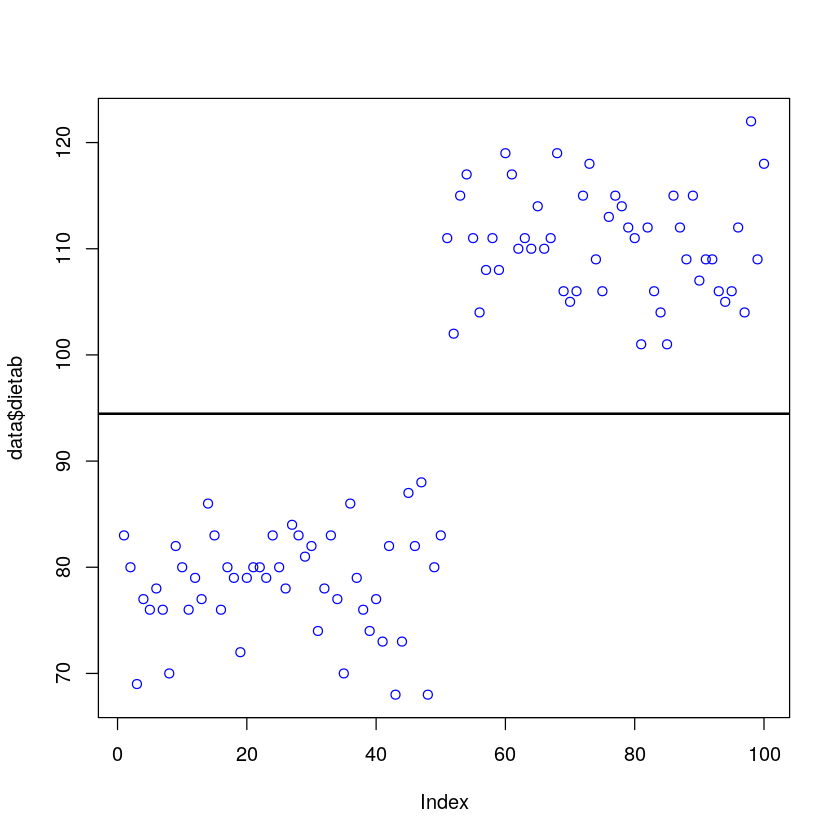

In [306]:
# Dieta B
median(data$dietab)
mean(data$dietab)
mean(data$dietab, trim=0.1)
mean(data$dietab, trim=0.2)
# Plot
plot(data$dietab, col="blue")
abline(h=median(data$dietab))
abline(h=mean(data$dietab))
abline(h=mean(data$dietab, trim=0.1))
abline(h=mean(data$dietab, trim=0.2))

[1] Dieta C
[1] Mediana:


[1] 73

[1] Media:


[1] 77,29

[1] Media podada alfa=0.1


[1] 75,3

[1] Media podada alfa=0.2


[1] 74,5

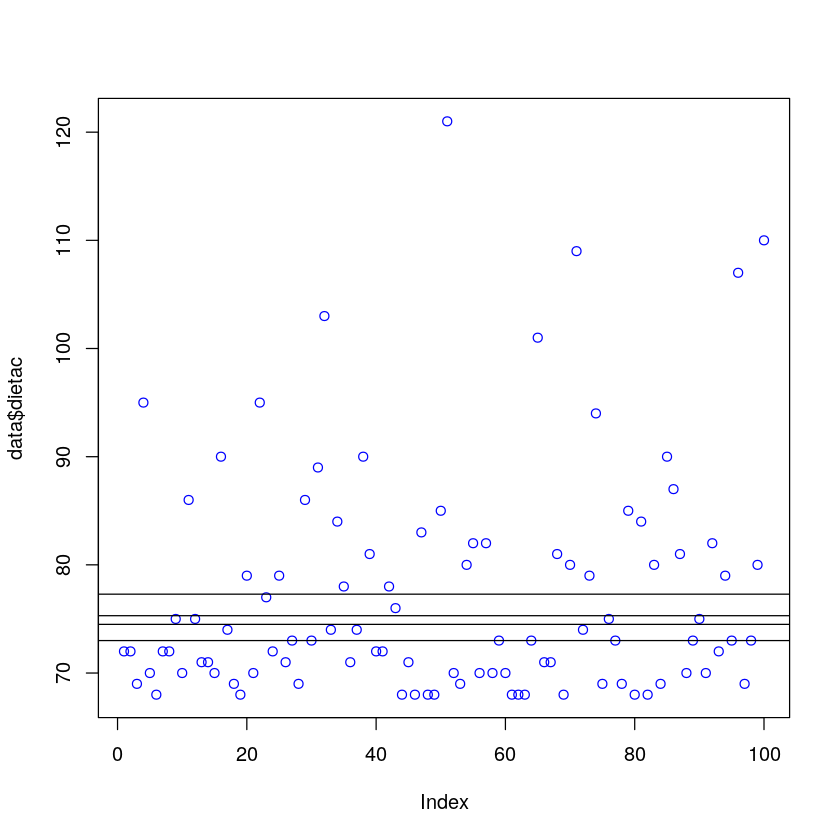

In [307]:
# Dieta C
print("Dieta C", quote=FALSE)
print("Mediana:", quote=FALSE)
median(data$dietac)
print("Media:", quote=FALSE)
mean(data$dietac)
print("Media podada alfa=0.1", quote=FALSE)
mean(data$dietac, trim=0.1)
print("Media podada alfa=0.2", quote=FALSE)
mean(data$dietac, trim=0.2)
# Plot
plot(data$dietac, col="blue")
abline(h=median(data$dietac))
abline(h=mean(data$dietac))
abline(h=mean(data$dietac, trim=0.1))
abline(h=mean(data$dietac, trim=0.2))

En la dieta C se observa una diferencia elevada entre distintas medidas, posiblemente a causa de outliers en los datos.

![tp2/2c.png](./img/tp2/2c.png)


In [308]:
dispersion <- data.frame(
    sd =rep(0,3),
    IQR=rep(0,3),
    mad=rep(0,3)
)
rownames(dispersion) <- c("dietaa",
                          "dietab",
                          "dietac")

dispersion$sd[1]  <-  sd(data$dietaa)
dispersion$IQR[1] <- IQR(data$dietaa)
dispersion$mad[1] <- mad(data$dietaa)

dispersion$sd[2]  <-  sd(data$dietab)
dispersion$IQR[2] <- IQR(data$dietab)
dispersion$mad[2] <- mad(data$dietab)

dispersion$sd[3]  <-  sd(data$dietac)
dispersion$IQR[3] <- IQR(data$dietac)
dispersion$mad[3] <- mad(data$dietac)

dispersion

,sd,IQR,mad
dietaa,"10,18404","14,50","11,1195"
dietab,"16,74552","31,25","22,9803"
dietac,"10,58329","11,00","5,9304"


La distancia intercuartil de B muestra una amplia gama de valores en los datos, que para estos datos, son valores de glucosa muy variables entre pacientes / sujetos de prueba.

![tp2/2d.png](./img/tp2/2d.png)


In [309]:
print("Dieta A", quote=FALSE)
quantile(data$dietaa, c(0.10, 0.25 ,0.50, 0.75, 0.90))
print("Dieta B", quote=FALSE)
quantile(data$dietab, c(0.10, 0.25, 0.50, 0.75, 0.90))
print("Dieta C", quote=FALSE)
quantile(data$dietac, c(0.10, 0.25, 0.50, 0.75, 0.90))

[1] Dieta A


10%    25%    50%    75%    90% 
 86,00  90,75  99,00 105,25 111,10

[1] Dieta B


10%    25%    50%    75%    90% 
 75,80  79,00  94,50 110,25 115,00

[1] Dieta C


10% 25% 50% 75% 90% 
 68  70  73  81  90

![tp2/2e.png](./img/tp2/2e.png)


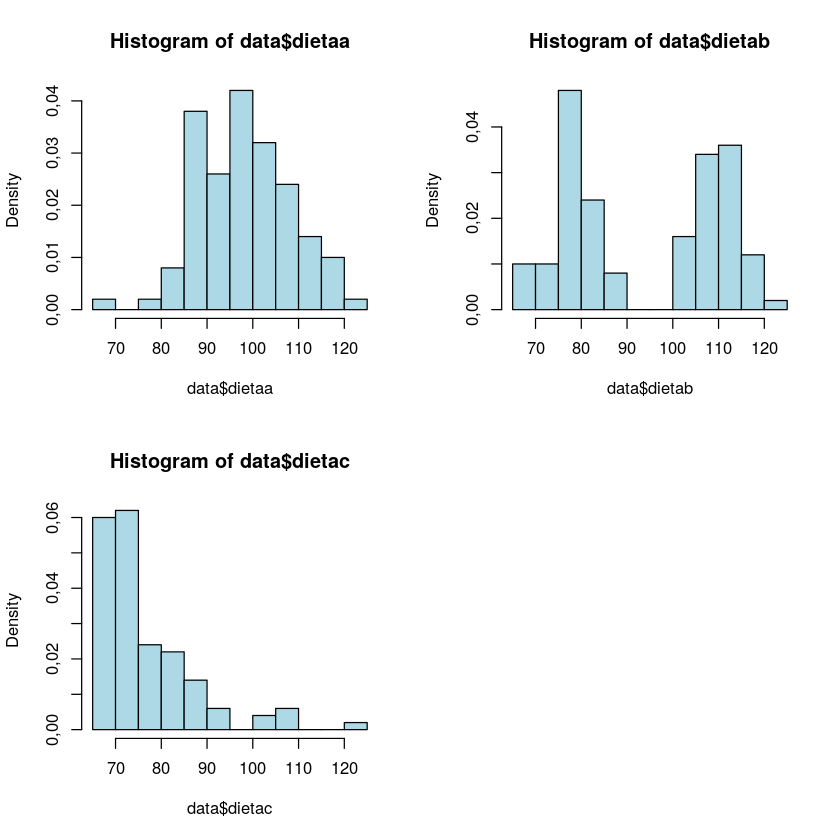

In [310]:
par(mfrow=c(2,2))
hist(data$dietaa, freq=FALSE, col="lightblue")
hist(data$dietab, freq=FALSE, col="lightblue")
hist(data$dietac, freq=FALSE, col="lightblue")

* La dieta B resulta *bimodal*, concentrándose en dos clusters de valores separados entre sí.


* La dieta C muestra valores MUY bajos de glucosa en sangre, indicio de anemia.


* En esta misma dieta, es asimétrica.


* El ajuste Normal solo parece razonable para la dieta A

![tp2/2f.png](./img/tp2/2f.png)


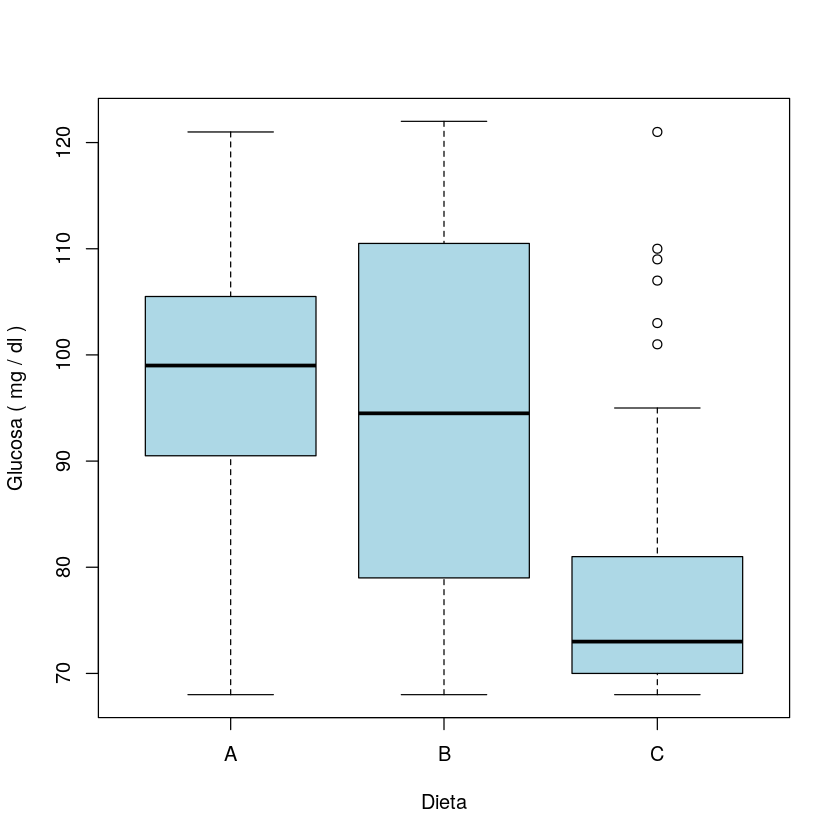

In [311]:
boxplot(data$dietaa, data$dietab, data$dietac, col="lightblue",
        xlab="Dieta", names=c("A","B","C"),
        ylab="Glucosa ( mg / dl )")

![tp2/2g.png](./img/tp2/2g.png)


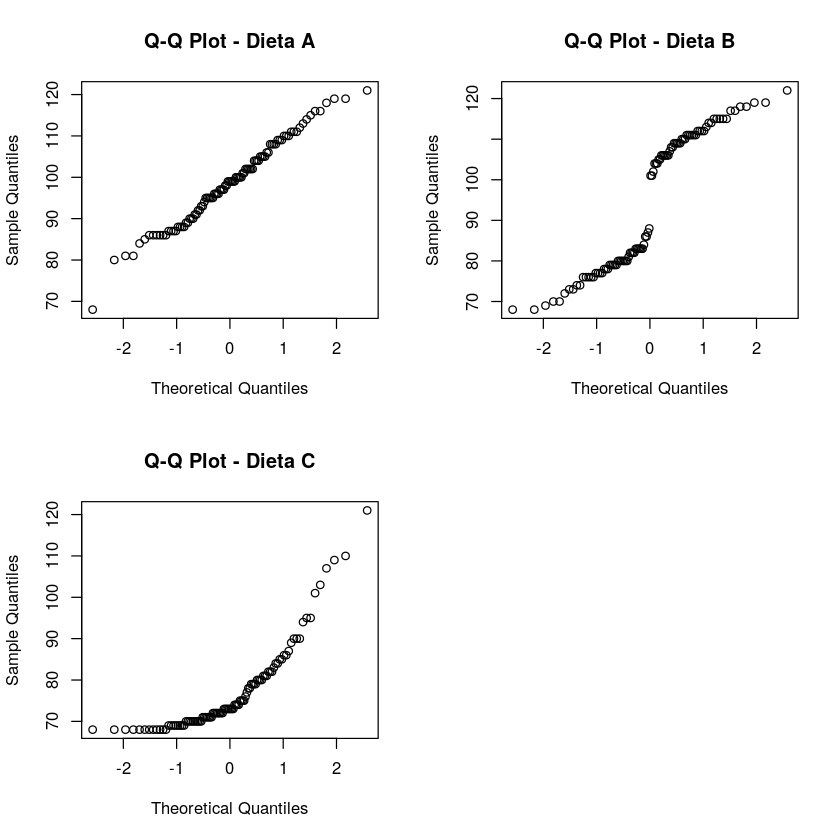

In [312]:
par(mfrow=c(2,2))
qqnorm(data$dietaa, main="Q-Q Plot - Dieta A")
qqnorm(data$dietab, main="Q-Q Plot - Dieta B")
qqnorm(data$dietac, main="Q-Q Plot - Dieta C")

![tp2/2h.png](./img/tp2/2h.png)

La dieta A parece ser la más razonable, ya que mantiene los valores en una media razonable, sin alejarnos demasiado de ella a causa de la dispersión.

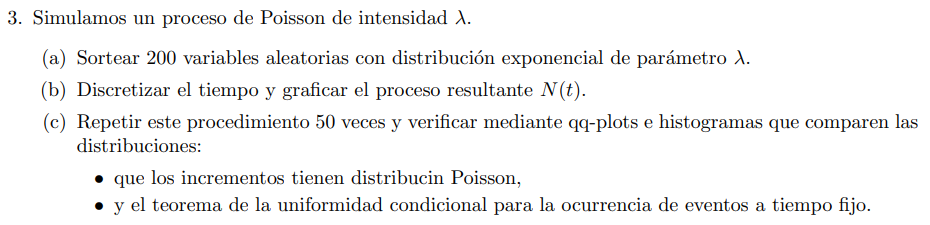

<iframe width="560" height="315" src="https://www.youtube.com/embed/jsqSScywvMc?start=557" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

https://www.youtube.com/embed/jsqSScywvMc?start=557

**a )** 200 va.iid. exponenciales con lambda=4

> $exponenciales_i \sim \varepsilon(\lambda=4)$
>
> $i \in [1, 200]$

In [313]:
cant <- 2000
lambda <- 4
exponenciales <- rexp(cant, lambda)
head(exponenciales)

[1] 0,01459748 0,05141545 0,13402724 0,02902687 0,03094881 1,07490240

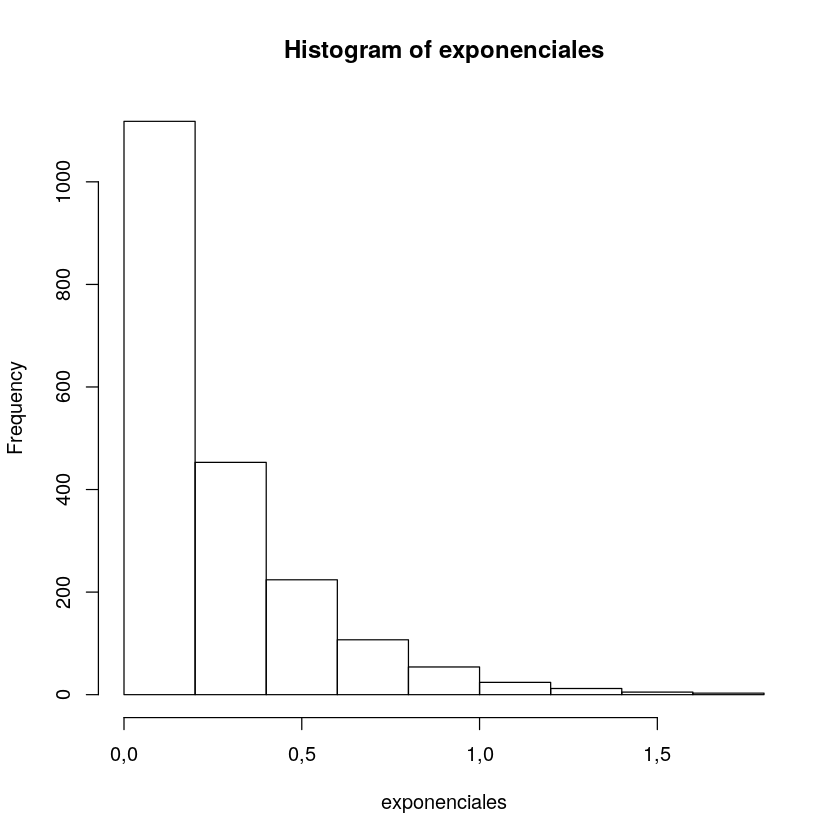

In [314]:
hist(exponenciales)

> **b )** Discretizar el tiempo y graficar el proceso resultante $N(t)$

In [315]:
obtenerExponenciales <- function(cant){
    exponenciales <- rexp(cant, lambda)
    t <- numeric(cant)
    for(i in 1:cant){
      # Discretizo tiempos como suma de exponenciales
      t[i] <- sum(exponenciales[1:i])
    }
    
    tiempos_de_llegada <- data.frame(
        llegada_numero = seq(1, cant, 1),
        tiempo = t
    )
    return(tiempos_de_llegada)
}

tiempos_de_llegada <- obtenerExponenciales(cant)
head(tiempos_de_llegada)
tail(tiempos_de_llegada)

llegada_numero,tiempo
1,"0,09784397"
2,"0,15025880"
3,"0,16521614"
4,"0,22351677"
5,"0,27351203"
6,"0,43314034"


,llegada_numero,tiempo
1995,1995,"516,1261"
1996,1996,"516,2462"
1997,1997,"516,2978"
1998,1998,"516,4291"
1999,1999,"516,8331"
2000,2000,"516,8601"


In [316]:
# Último evento
tail(tiempos_de_llegada, n=1)

,llegada_numero,tiempo
2000,2000,"516,8601"


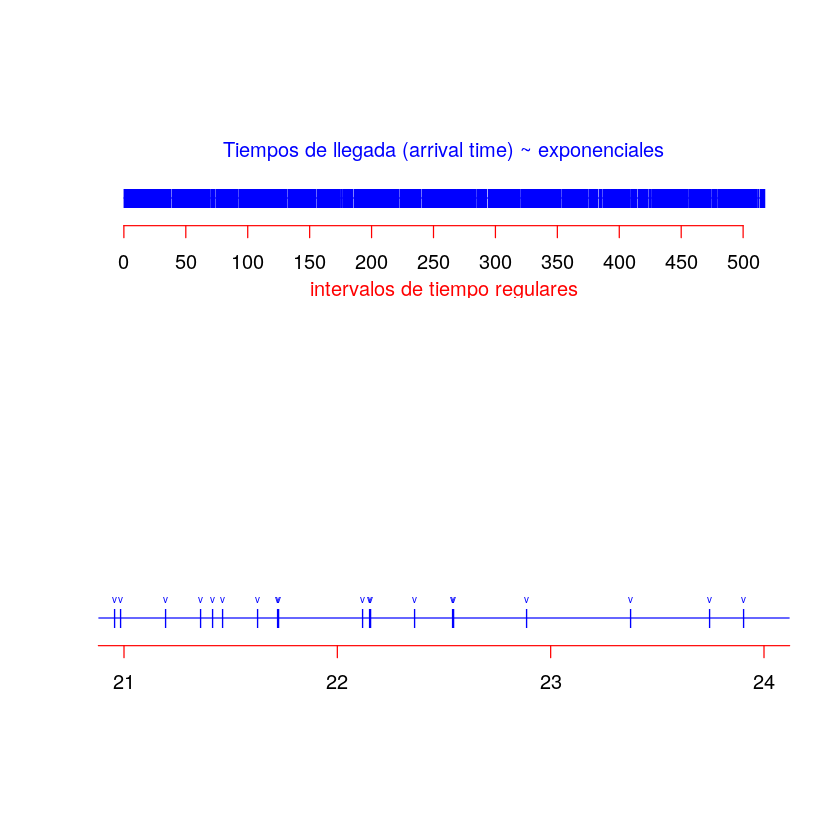

In [317]:
par(mfrow=c(2,1))

t <- tiempos_de_llegada$tiempo

plot(t, rep(0, length(t)), type = 'o', pch = '|',
     ylab = '', xlab='t (segundos)',
     xaxt='n', col='blue',
     yaxt='n', ann=FALSE, bty='n')

axis(side=1, pos=c(-0.3, 0), at=seq(0, tail(t, n=1)+5, 50), col=c('red'))
text(x=tail(t, n=1)/2, y=c(1/2, -1),
     labels=c('Tiempos de llegada (arrival time) ~ exponenciales',
              'intervalos de tiempo regulares'), col=c('blue', 'red'))

# Zooming in
plot(t, rep(0, length(t)), type = 'o', pch = '|', xlim=c(21,24),
     ylab = '', xlab='t (segundos)', 
     xaxt='n', col='blue',
     yaxt='n', ann=FALSE, bty='n')
# Flechitas
points(t, rep(0.2, length(t)),
       pch = 'v', cex=0.5,
       xlim=c(21,24),
       col=c('blue'))

axis(side=1, pos=c(-0.3, 0), at=seq(0, tail(t, n=1)+5, 1), col=c('red'))

text(x=tail(t, n=1)/2, y=c(1/2, -1),
     labels=c('Tiempos de llegada (arrival time) ~ exponenciales',
              'intervalos de tiempo regulares'), col=c('blue', 'red'))

Se nos pide:

* Contar cantidad de llegadas (*arrivals*/éxitos) desde ***el comienzo* hasta algún tiempo** $t$
  
  https://en.wikipedia.org/wiki/Poisson_point_process#Interpreted_as_a_counting_process
  
  $$N(t) = \text{# llegadas hasta tiempo t}$$
  
* Graficarlo:
  
  * se espera un aumento uniforme de $N(t)$ a medida que aumentamos $t$ 

* En **c )**:
  
  * Analizar cantidad de llegadas en un intervalo de tiempo $\Delta t$
  
    Donde:
  
    $$N(\Delta t) = N(t) - N(t - a)$$
  
    con $a$ el ancho de los intervalos de tiempo uniformes. 
    
  * Se espera que $N(\Delta t)$ (#llegadas en intervalo $\Delta t$) sea $\mathcal Poisson$

In [318]:
par(mfrow=c(2,2))
# dos formas de pensarlo:
# 1. Discretizar el intervalo de tiempo muy finamente, y 'tirar una moneda' en cada uno.
# 2. Contar eventos de cada proceso (ventana de tiempo fijo Tao) en el total

procesoPoissonEnT <- function(tao, interval=1){
    # Cuento eventos hasta tiempo dado
    count_t <- 1
    count_int <- 1
    while(tiempos_de_llegada$tiempo[count_t] < tao){
        #if (tiempos_de_llegada$tiempo[count_t] >= tao-interval){
        count_int <- count_int + 1
        #}
        count_t <- count_t+1
    }
    respuesta_para_un_t_fijo <- count_int-1
    return(respuesta_para_un_t_fijo)
}

[1]  6 10 10 14 18 19 24 27 33 38

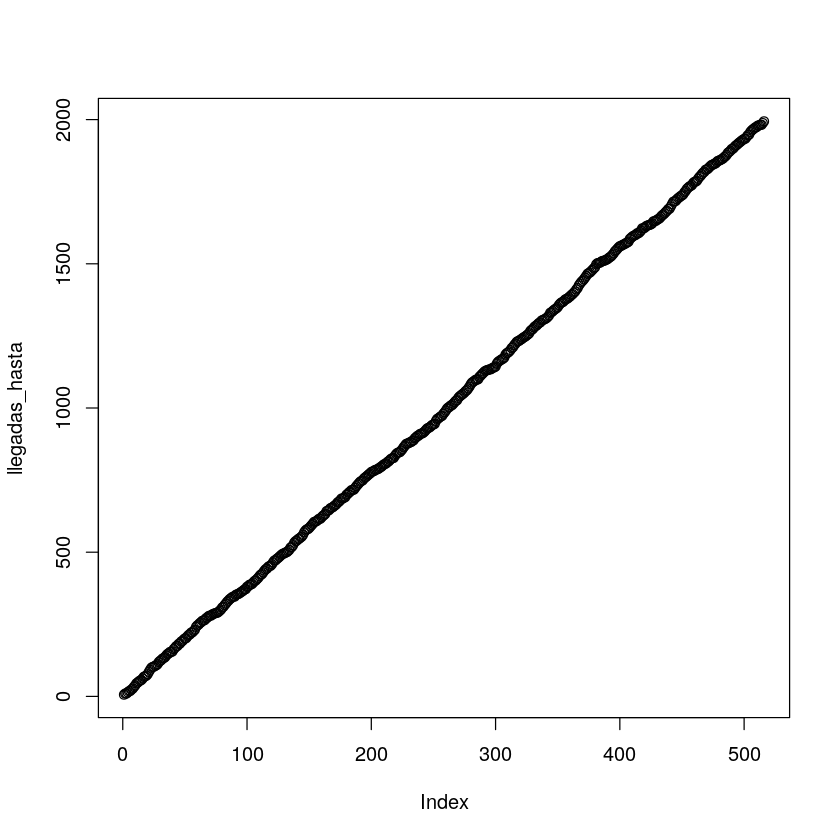

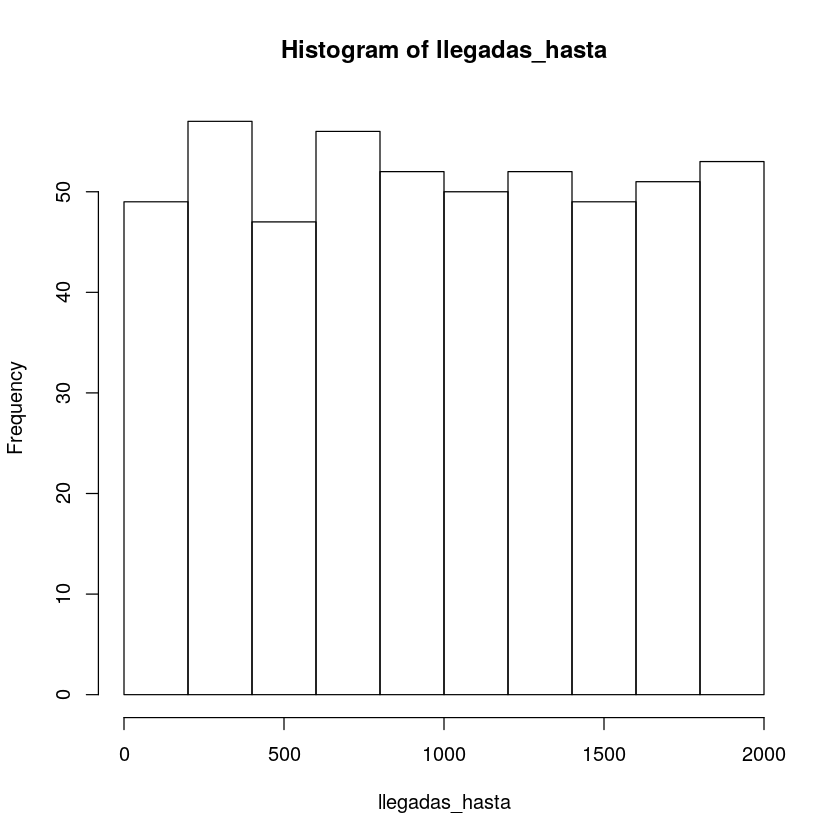

In [319]:
llegadas_hasta <- numeric(length(tiempos_de_llegada))
for (t in seq(1, tail(tiempos_de_llegada$tiempo, n=1), 1)){
    llegadas_hasta[t] <- procesoPoissonEnT(t, 10)
}

head(llegadas_hasta, n=10)
plot(llegadas_hasta)
hist(llegadas_hasta)

> **c )** Repetir el procedimiento 50 veces y verificar que tienen distribución Poisson

  * Analizar cantidad de llegadas en un intervalo de tiempo $\Delta t$
  
    Donde:
  
    $$N(\Delta t) = N(t) - N(t - a)$$
  
    con $a$ el ancho de los intervalos de tiempo uniformes. 
    
    
  * Se espera que $N(\Delta t)$ (#llegadas en intervalo $\Delta t$) tenga distribución $\mathcal Poisson (\theta \Delta t)$

Teniendo un vector `llegadas_hasta` ($N(t)$) que contiene la **cantidad de llegadas hasta cada** uno de los **tiempos** $t$ (índices del vector),

podemos **restar cantidades** $N(t)$ y $N(t-a)$ para obtener **cantidades en cada incremento** de tiempo $\Delta t$ (de nuevo, donde los incrementos de tiempo están caracterizados por el índice del vector)

Con $\theta = 4$ elegida al comienzo para los **200 sorteos *exponenciales***, obtenemos (en su acumulación) alrededor de **50 intervalos de tiempos *uniformes***.

In [320]:
length(llegadas_hasta)

[1] 516

In [321]:
contarEnIntervalos <- function(llegadas_hasta, intervalo=10){
valores_poisson <- numeric(length(llegadas_hasta))

for(t in 1:length(llegadas_hasta)){
    if(t <= intervalo){
        valores_poisson[t] <- llegadas_hasta[t]
    } else{
        valores_poisson[t] <- llegadas_hasta[t] - llegadas_hasta[t-intervalo]
    }
}
    return (valores_poisson)
}

valores_poisson <- contarEnIntervalos(llegadas_hasta, intervalo=1)
head(valores_poisson, n=10)

[1] 6 4 0 4 4 1 5 3 6 5

[1] Mean: 


[1] 3,864341

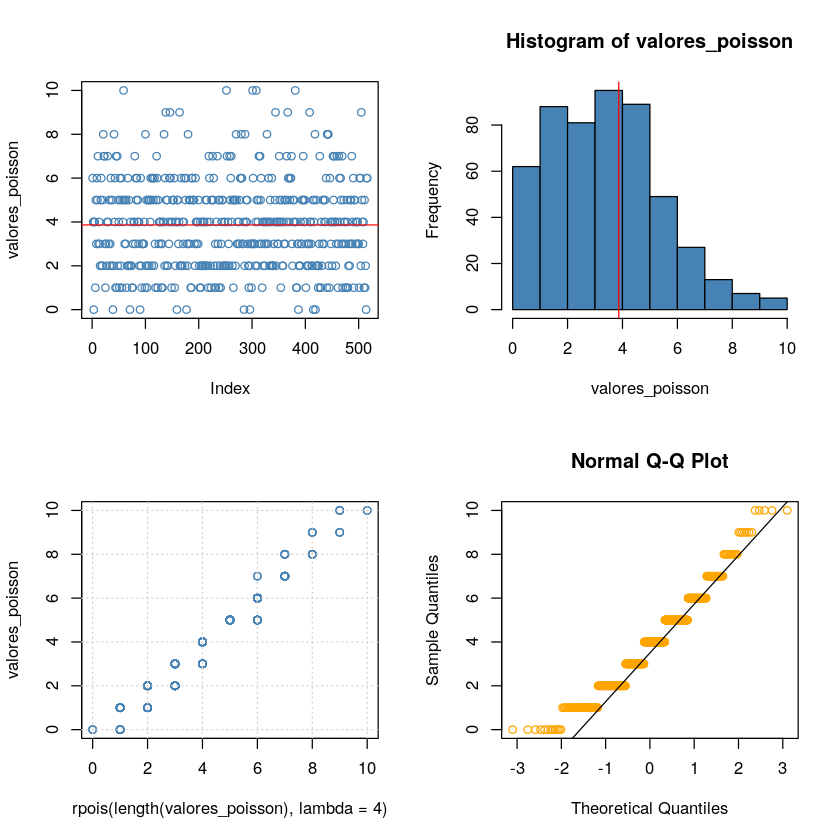

In [327]:
par(mfrow=c(2,2))
plot(valores_poisson, col='steelblue')
abline(h=mean(valores_poisson), col='red')

hist(valores_poisson, col='steelblue')
abline(v=mean(valores_poisson), col='red')

qqplot(x=rpois(length(valores_poisson), lambda=4), y=valores_poisson, col='steelblue')
#qqline(valores_poisson,
#       qpois(p=seq(0.01, 0.99, length.out=length(valores_poisson)), lambda=4),
#       col='black')
grid()

qqnorm(valores_poisson, col='orange')
qqline(valores_poisson, col = "black", lwd = 1)

print('Mean: ', quote=FALSE)
mean(valores_poisson)

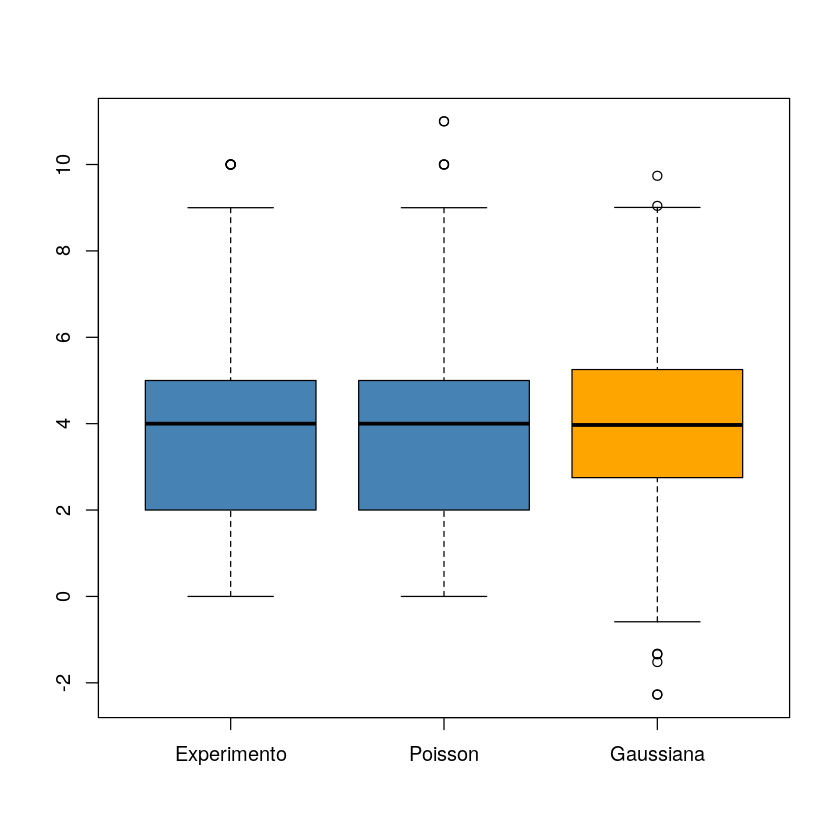

In [328]:
boxplot(valores_poisson,
        rpois(length(valores_poisson), lambda=4),
        rnorm(length(valores_poisson), mean=mean(valores_poisson), sd=sd(valores_poisson)),
        col=c('steelblue','steelblue','orange'),
        names=c('Experimento','Poisson','Gaussiana'))
#qqline(valores_poisson,
#       qpois(p=seq(0.01, 0.99, length.out=length(valores_poisson)), lambda=4),
#       col='black')

**Recap:**

> *Un@ no entiende lo que es un Proceso de Poisson hasta que intenta programarlo.*
>
>
> **Contamos ocurrencias** de eventos (llegadas) **en intervalos de tiempo**:
>
> >Donde **cada llegada** puede pensarse como una $Bernoulli(p)$ en un **pequeño intervalo discreto**
>>
> >PERO solo es $1$ ó $0$, **ignorando** el caso de **dos o más llegadas (éxitos) en un mismo intervalo**
>>
> >**Para evitar eso:** buscamos el **límite de los intervalos** cuando su ancho tiende a cero, representando de esa forma, llegadas (éxitos) en un tiempo contínuo.
>>
>>> ***Demo en Práctica 7:*** [github.com/LecJackS/Probabilidades-y-Estadistica-2019-2doC/blob/master/Practica 7 (nueva) - Ejercicio 5.ipynb](https://github.com/LecJackS/Probabilidades-y-Estadistica-2019-2doC/blob/master/Practica%207%20(nueva)%20-%20Ejercicio%205.ipynb)
>>
>>
> >El **resultado de este límite** sobre la distribución del [Proceso de Bernoulli](https://en.wikipedia.org/wiki/Bernoulli_process), que es $Binomial(n,p)$, da como resultado un [**Proceso de Poisson**](https://en.wikipedia.org/wiki/Poisson_process).
>
> Este último cumple ciertas propiedades que fueron exploradas en este ejercicio.
>
> Partiendo desde el hecho de que **la distancia entre eventos (independientes) en un Proceso de Poisson, sigue una distribución Exponencial**.

# Código compacto

In [351]:
obtenerExponenciales <- function(cant, lambda){
    exponenciales <- rexp(cant, lambda)
    t <- numeric(cant)
    for(i in 1:cant){
      # Discretizo tiempos como suma de exponenciales
      t[i] <- sum(exponenciales[1:i])
    }
    
    llegadas <- data.frame(
        llegada_numero = seq(1, cant, 1),
        tiempo = t
    )
    return (llegadas)
}

In [405]:
ventanaPoisson <- function(llegadas, interval=1){
    # Cuento eventos en intervalos de tiempo consecutivos
    N_delta_t <- rep(0, length(llegadas$tiempo))
    for(tao in 1:length(llegadas$tiempo)){
        # Filtro valores en ventana, y los cuento
        N_delta_t[tao] <- length(llegadas$tiempo[llegadas$tiempo < tao &
                                                 llegadas$tiempo > (tao-interval)])
    }
    # Devuelvo cantidad por unidad de tiempo (divido por 'interval')
    return(N_delta_t/interval)
}

In [406]:
# Genero exponenciales concatenadas en el tiempo
cant <- 5000
lambda <- 1
llegadas <- obtenerExponenciales(cant, lambda)
# Recorro las unidades de tiempo generadas y cuento 'llegadas' en ventana
# Con 'ancho' el ancho del intervalo/ventana en unidades de tiempo
ancho <- 10
N_delta_t <- ventanaPoisson(llegadas, interval=ancho)

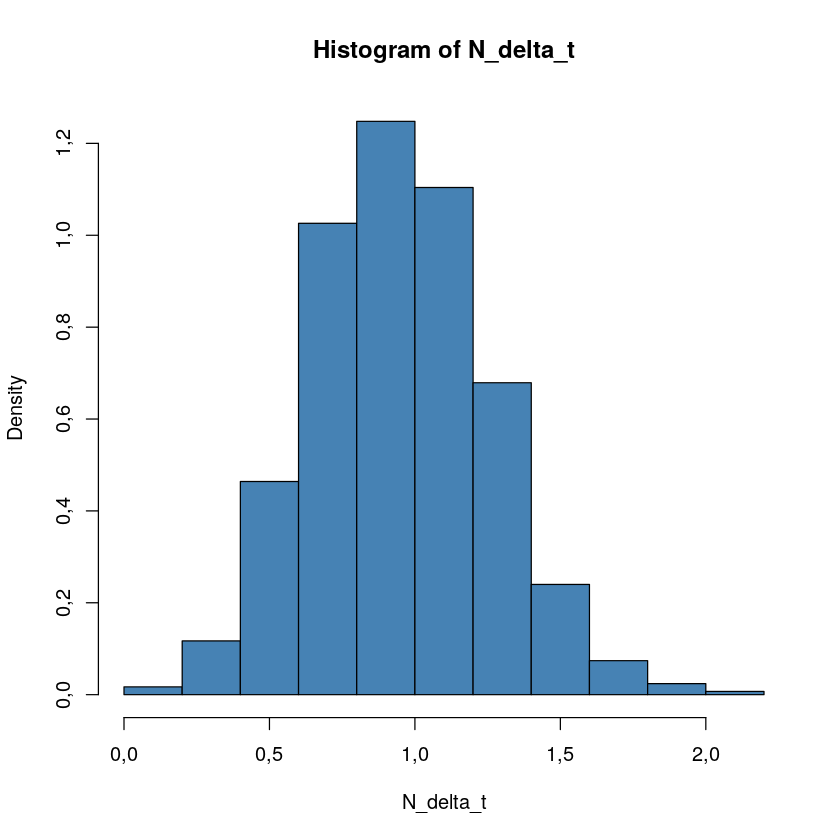

In [412]:
hist(N_delta_t, freq=FALSE, col='steelblue')

Observar como el ancho de la ventana influye en la distribución de las llegadas en la misma.

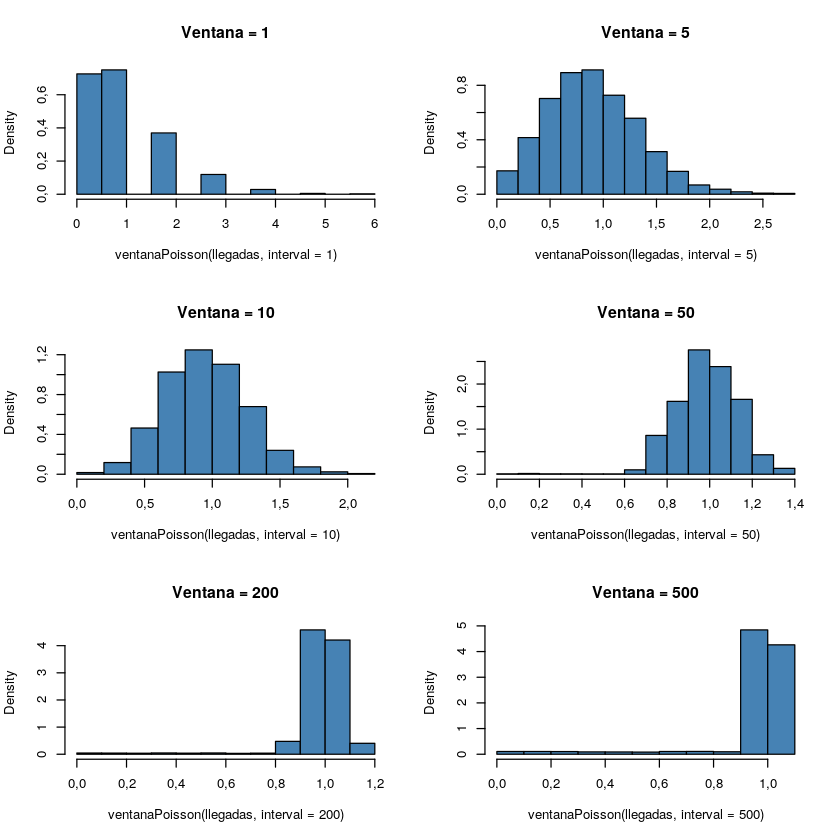

In [411]:
par(mfrow=c(3,2))
hist(ventanaPoisson(llegadas, interval=1),   freq=FALSE, main='Ventana = 1', col='steelblue')
hist(ventanaPoisson(llegadas, interval=5),   freq=FALSE, main='Ventana = 5', col='steelblue')
hist(ventanaPoisson(llegadas, interval=10),  freq=FALSE, main='Ventana = 10', col='steelblue')
hist(ventanaPoisson(llegadas, interval=50),  freq=FALSE, main='Ventana = 50', col='steelblue')
hist(ventanaPoisson(llegadas, interval=200), freq=FALSE, main='Ventana = 200', col='steelblue')
hist(ventanaPoisson(llegadas, interval=500), freq=FALSE, main='Ventana = 500', col='steelblue')